# Application of Arificial Neural Network

In [ ]:
import os
import numpy as np
from numpy import arange
from numpy import absolute
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from IPython.display import Image
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [ ]:
! pip install prettytable
from prettytable import PrettyTable

In [ ]:
full_data = pd.read_csv("model_data.csv")

In [ ]:
field_df = pd.read_csv("field_df.csv")

In [ ]:
gk_df = pd.read_csv("gk_df.csv")

In [ ]:
#create goalkeeper dataframe by selecting players with corresponding position index
gk_df = full_data[full_data.position_dummy == 1]
gk_df = gk_df[["long_name","age", "height_cm", "weight_kg", "value_eur", "gk_diving", "gk_handling", "gk_kicking", "gk_reflexes", "gk_speed", "gk_positioning", "movement_acceleration", "movement_sprint_speed", "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_jumping", "power_stamina", "power_strength", "power_long_shots", "mentality_vision", "mentality_penalties", "mentality_composure", "number_of_traits"]]

In [ ]:
field_df = full_data[full_data.position_dummy != 1]
field_df = field_df.drop(["Unnamed: 0", "sofifa_id", "gk_diving", "gk_handling", "gk_kicking", "gk_reflexes", "gk_speed", "gk_positioning", "international_reputation", "position_dummy", "preferred_foot"],axis=1)

In [ ]:
#for later processing, create dictionaries containing players name/age and respective index in base dataframe
name_gk = list(gk_df.long_name)
index_gk = list(gk_df.index)
gk_zip_iter = zip(index_gk, name_gk)
gk_dict = dict(gk_zip_iter)

name_field = list(field_df.long_name)
index_field = list(field_df.index)
field_zip_iter = zip(index_field, name_field)
field_dict = dict(field_zip_iter)

In [ ]:
age_gk = list(gk_df.age)
gk_age_zip_iter = zip(index_gk, age_gk)
gk_age_dict = dict(gk_age_zip_iter)
gk_df= gk_df.drop(["long_name"], axis=1)

age_field = list(field_df.age)
field_age_zip_iter = zip(index_field, age_field)
field_age_dict = dict(field_age_zip_iter)
field_df = field_df.drop(["long_name"],axis = 1)

In [ ]:
gk_df = gk_df.astype(float)
field_df = field_df.astype(float)

In [ ]:
gk_df

,age,height_cm,weight_kg,value_eur,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,...,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_vision,mentality_penalties,mentality_composure,number_of_traits
2,27.0,188.0,87.0,18.132999,87.0,92.0,78.0,90.0,52.0,90.0,...,49.0,59.0,78.0,41.0,78.0,12.0,65.0,11.0,68.0,2.0
7,28.0,187.0,85.0,18.056837,88.0,85.0,88.0,90.0,45.0,88.0,...,43.0,66.0,79.0,35.0,78.0,10.0,70.0,25.0,70.0,3.0
9,27.0,191.0,91.0,17.950677,86.0,88.0,85.0,89.0,51.0,91.0,...,37.0,64.0,52.0,32.0,78.0,14.0,66.0,23.0,65.0,2.0
12,28.0,199.0,96.0,17.840862,84.0,89.0,74.0,88.0,48.0,85.0,...,45.0,56.0,68.0,38.0,70.0,17.0,44.0,27.0,66.0,2.0
16,34.0,193.0,92.0,17.182806,87.0,87.0,91.0,89.0,57.0,86.0,...,35.0,68.0,77.0,43.0,80.0,16.0,70.0,47.0,70.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18654,17.0,175.0,70.0,10.819778,49.0,48.0,47.0,50.0,34.0,47.0,...,49.0,35.0,50.0,40.0,38.0,10.0,40.0,15.0,37.0,0.0
18670,21.0,185.0,70.0,10.596635,46.0,46.0,58.0,51.0,30.0,44.0,...,48.0,44.0,61.0,18.0,49.0,7.0,27.0,12.0,27.0,0.0
18675,16.0,180.0,76.0,10.308953,47.0,46.0,46.0,50.0,20.0,45.0,...,47.0,35.0,64.0,20.0,41.0,7.0,29.0,17.0,38.0,0.0
18686,22.0,196.0,85.0,10.308953,49.0,47.0,45.0,46.0,54.0,44.0,...,54.0,34.0,59.0,33.0,51.0,13.0,43.0,8.0,13.0,0.0


### Applying Neural Network with goalkeepers dataset

In [ ]:
#load relative libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


In [ ]:
import numpy as np
import tensorflow as tf
import random as rn

import os
os.environ['PYTHONHASHSEED'] = '0'

os.environ['CUDA_VISIBLE_DEVICES'] = ''
np.random.seed(37)
rn.seed(1254)
tf.random.set_seed(89)

Firs, we start applying the model on the goalkeepers dataset. Therefore we divide the columns in features and target variable respectively  

In [ ]:
X = gk_df.drop(["value_eur"], axis = 1)   #independent features
y = gk_df["value_eur"]                 #dependent features

In [ ]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state= 42)

In [ ]:
#checking the shape of our train set and test set

print("Training set shape: {}".format(X_train.shape))
print("Test set shape: {}".format(X_test.shape))
print("Training label set shape: {}".format(y_train.shape))
print("Test label set shape: {}".format(y_test.shape))

Training set shape: (1368, 23)
Test set shape: (685, 23)
Training label set shape: (1368,)
Test label set shape: (685,)


Subsequently, before implementing the neural network, is highly suggested to normalize the data in order to have every features ranging in the same scale. 
Consequently, the model would be able to efficiently tweak every parameters for every node and to quickly minimize the loss function.

For this purpose we decide tio use MinMaxScaler. 



In [ ]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now we are ready to kick off. In order to better undesrtand if our model is generalizing well with the unseen data or if some parameters need to be further tuned, we are going to build a first algorithm as a benchmark.
The following model will have:
- 4 layers in total:
    - the input layers will be provided with 128 neurons
    - the two hidden layers will be providedd with 64 and 32 respectively
     - the output layer will have only one neuron for the single output variable.

-  As a rule of thumb, every layer should have the same activation function. As we are dealing with a regression problem and we want to predict the market value, the output layer will have a linear activation function. 


In [ ]:
#Since now we are predicting a single continuous value, the output layer will only have 1 node.

model = Sequential()
model.add(Dense(128, input_dim = X.shape[1], activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))

#Output layer
model.add(Dense(1, activation = "linear"))

In [ ]:
model.compile(loss = "mse", optimizer = "adam", metrics = ["mse", "mae", "mape"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               3072      
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 33        
Total params: 13,441
Trainable params: 13,441
Non-trainable params: 0
_________________________________________________________________


As we can clearly seen from the summary in the previous cell, our model will be provided for a total of 4 dense layers and  more than 13.000 parameters to be adjusted.

Whereas in the following cell, we fit the model keeping the default batch'size (however in the following cells it has been questioned which was the best batch's size for the NN ) and with a total amount of 250 epochs. Moreover, to keep track of the algorithm's performances, we decided to use the fucntion validation_split() within the Keras package. 

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs = 250)

Epoch 1/250
35/35 [==============================] - 1s 6ms/step - loss: 149.9090 - mse: 149.9090 - mae: 12.0993 - mape: 92.5916 - val_loss: 21.6677 - val_mse: 21.6677 - val_mae: 4.4713 - val_mape: 34.9451
Epoch 2/250
35/35 [==============================] - 0s 2ms/step - loss: 10.1970 - mse: 10.1970 - mae: 2.6564 - mape: 20.5029 - val_loss: 4.5387 - val_mse: 4.5387 - val_mae: 1.7496 - val_mape: 14.0617
Epoch 3/250
35/35 [==============================] - 0s 2ms/step - loss: 3.7841 - mse: 3.7841 - mae: 1.6259 - mape: 12.9127 - val_loss: 3.2745 - val_mse: 3.2745 - val_mae: 1.5447 - val_mape: 12.3525
Epoch 4/250
35/35 [==============================] - 0s 2ms/step - loss: 3.1007 - mse: 3.1007 - mae: 1.4498 - mape: 11.5973 - val_loss: 2.5281 - val_mse: 2.5281 - val_mae: 1.3585 - val_mape: 10.8216
Epoch 5/250
35/35 [==============================] - 0s 2ms/step - loss: 2.1682 - mse: 2.1682 - mae: 1.2089 - mape: 9.6536 - val_loss: 1.8439 - val_mse: 1.8439 - val_mae: 1.1333 - val_mape: 8.991

35/35 [==============================] - 0s 2ms/step - loss: 0.0572 - mse: 0.0572 - mae: 0.1841 - mape: 1.4240 - val_loss: 0.0722 - val_mse: 0.0722 - val_mae: 0.1986 - val_mape: 1.5533
Epoch 84/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0508 - mse: 0.0508 - mae: 0.1708 - mape: 1.3179 - val_loss: 0.0779 - val_mse: 0.0779 - val_mae: 0.2209 - val_mape: 1.7076
Epoch 85/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0889 - mse: 0.0889 - mae: 0.2370 - mape: 1.8234 - val_loss: 0.0560 - val_mse: 0.0560 - val_mae: 0.1780 - val_mape: 1.3908
Epoch 86/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0560 - mse: 0.0560 - mae: 0.1810 - mape: 1.3994 - val_loss: 0.0560 - val_mse: 0.0560 - val_mae: 0.1769 - val_mape: 1.3789
Epoch 87/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0511 - mse: 0.0511 - mae: 0.1706 - mape: 1.3166 - val_loss: 0.0574 - val_mse: 0.0574 - val_mae: 0.1810 - val_mape: 1.4123
Epoch 88/250
35/35 [===

35/35 [==============================] - 0s 2ms/step - loss: 0.0394 - mse: 0.0394 - mae: 0.1557 - mape: 1.1971 - val_loss: 0.0475 - val_mse: 0.0475 - val_mae: 0.1655 - val_mape: 1.2939
Epoch 166/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0346 - mse: 0.0346 - mae: 0.1435 - mape: 1.1067 - val_loss: 0.0545 - val_mse: 0.0545 - val_mae: 0.1738 - val_mape: 1.3509
Epoch 167/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0365 - mse: 0.0365 - mae: 0.1469 - mape: 1.1254 - val_loss: 0.0809 - val_mse: 0.0809 - val_mae: 0.2200 - val_mape: 1.7307
Epoch 168/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0404 - mse: 0.0404 - mae: 0.1561 - mape: 1.2109 - val_loss: 0.0694 - val_mse: 0.0694 - val_mae: 0.1992 - val_mape: 1.5501
Epoch 169/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0389 - mse: 0.0389 - mae: 0.1541 - mape: 1.1831 - val_loss: 0.0889 - val_mse: 0.0889 - val_mae: 0.2327 - val_mape: 1.8095
Epoch 170/250
35/35

35/35 [==============================] - 0s 2ms/step - loss: 0.0288 - mse: 0.0288 - mae: 0.1332 - mape: 1.0232 - val_loss: 0.0589 - val_mse: 0.0589 - val_mae: 0.1747 - val_mape: 1.3742
Epoch 248/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0324 - mse: 0.0324 - mae: 0.1411 - mape: 1.0939 - val_loss: 0.0535 - val_mse: 0.0535 - val_mae: 0.1609 - val_mape: 1.2665
Epoch 249/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0319 - mse: 0.0319 - mae: 0.1387 - mape: 1.0747 - val_loss: 0.0523 - val_mse: 0.0523 - val_mae: 0.1683 - val_mape: 1.3133
Epoch 250/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0298 - mse: 0.0298 - mae: 0.1358 - mape: 1.0356 - val_loss: 0.0641 - val_mse: 0.0641 - val_mae: 0.1931 - val_mape: 1.4933


Subsequently, after all the epochs, we decided to plot the loss function for the training and the test set respectively as the graph is capable of giving useful insight in terms of overfitting or underfitting. 

Hence, as it can be see from the following line graph, it seems that model learns quikly how to correctly adjust all the parameters suggesting that 250 epochs would be to much

Train: 0.044, Test: 0.066


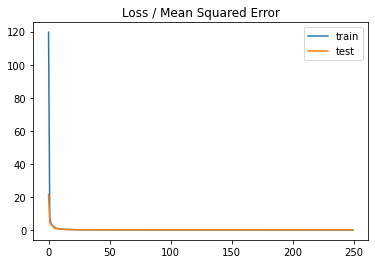

In [ ]:
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse[0], test_mse[0]))
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
epochs = len(history.history["loss"])
print("Epochs", epochs)

Epochs 250


Let's predict the market values of the goalkeepers!

In [ ]:
y_pred = model.predict(X_test)
mse_gk = metrics.mean_squared_error(y_pred, y_test)
rmse_gk = np.sqrt(mean_squared_error(y_pred, y_test))
mae_gk = mean_absolute_error(y_test,y_pred)
mape_gk = mean_absolute_percentage_error(y_test,y_pred)
r2_score_gk = r2_score(y_test, y_pred)

print("Mean squarred error: {}".format(mse_gk))
print("Root mean squarred error: {}".format(rmse_gk))
print("Mean Absolute Error: {}".format(mae_gk))
print("MAPE: {}".format(mape_gk))
print("R squared: {}".format(r2_score_gk))

Mean squarred error: 0.06571800114811646
Root mean squarred error: 0.2563552245383668
Mean Absolute Error: 0.203209886859501
MAPE: 0.015740379014569924
R squared: 0.9695732949674287


It's clear that our model has achieved good results. The mse and rmse are pretty low, indicating that the results are really similar to the actual values

### Hyperparameter optimization with RandomSearch

However, we still do not know if the choosen model would be the best one. Hence we decide to pursue our analysis by performing hyperparameter optimization.
The following model has been furtherly tuned using RandomSearch() in keras tuner. 
Although there are several hyperparameters which can be investigated and given the good performencases obtained in the previous model, the scope of this step has been sfifted to the optimizations of the following factors:
- number of neurons in the input layer
- learning rate: [1e-2, 1e-3, 1e-4]
- number of hidden layers: 1 to 7
- number of neurons in each hidden layer: 5 to 128

The loss and actibation function are the same mentioned above 

In [ ]:
pip install -U keras-tuner

Requirement already up-to-date: keras-tuner in c:\users\mazzi\anaconda3\lib\site-packages (1.0.2)Note: you may need to restart the kernel to use updated packages.



In [ ]:
from numpy.random import seed
seed(1)

from tensorflow import keras
from keras.models import Sequential
import kerastuner
from kerastuner.tuners import RandomSearch

In [ ]:
def build_new_model(hp):
    first_layers_neuron = hp.Choice("Number of neurons Input layer", [128, 100, 80, 60, 40, 30, 10])
    model = Sequential()
    model.add(Dense(first_layers_neuron, input_dim = X.shape[1], activation = "relu"))
    for i in range(hp.Int('num_layers', 1, 7)):                      #number of hidden layers
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=5,       #min number of neurons
                                            max_value=128,     #max number of neurons
                                            step=32),
                               activation='relu'))
    model.add(keras.layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [0.01, 1e-3, 1e-4])),  #what should be the learning rate
        loss='mse',
        metrics=['mse'])
    return model

In [ ]:
tuner2 = RandomSearch(
    build_new_model,
    objective='val_mse',
    max_trials=5,
    executions_per_trial=3,
    directory='temp_second')

INFO:tensorflow:Reloading Oracle from existing project temp_second\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from temp_second\untitled_project\tuner0.json


In [ ]:
tuner2.search(X_train, y_train, epochs = 250, validation_data = (X_test, y_test))

INFO:tensorflow:Oracle triggered exit


Next we want to get the best parameters which will be consequently implemented in our model in oorder to get the predictions.

In [ ]:
tuner2.get_best_hyperparameters()[0].values


{'Number of neurons Input layer': 128,
 'num_layers': 5,
 'units_0': 5,
 'learning_rate': 0.001,
 'units_1': 101,
 'units_2': 37,
 'units_3': 69,
 'units_4': 37,
 'units_5': 37,
 'units_6': 101}

Therefore our model will be built with the following parameters:
- Input layer with 128 neurons
- 5 hidden layers with 5, 101, 37, 69, 37 neurons respectively
- learning rate of 0.001 and Adam as our optimizer

In [ ]:
tuner2.get_best_models()[0].summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3072      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
_________________________________________________________________
dense_2 (Dense)              (None, 101)               606       
_________________________________________________________________
dense_3 (Dense)              (None, 37)                3774      
_________________________________________________________________
dense_4 (Dense)              (None, 69)                2622      
_________________________________________________________________
dense_5 (Dense)              (None, 37)                2590      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3

### NN without Earlystopping (goalkeepers dataset)

In [ ]:
from keras.models import Sequential

model = Sequential()
model.add(Dense(128, input_dim = X.shape[1], activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(101, activation = "relu"))
model.add(Dense(37, activation = "relu"))
model.add(Dense(69, activation = "relu"))
model.add(Dense(37, activation = "relu"))


#Output layer
model.add(Dense(1, activation = "linear"))

In [ ]:
import numpy

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = "mse", optimizer = opt, metrics = ["mse", "mae", "mape"])

history_1 = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs = 250)

Epoch 1/250
35/35 [==============================] - 1s 7ms/step - loss: 146.7340 - mse: 146.7340 - mae: 11.8556 - mape: 90.7250 - val_loss: 13.1888 - val_mse: 13.1888 - val_mae: 2.9063 - val_mape: 22.1842
Epoch 2/250
35/35 [==============================] - 0s 3ms/step - loss: 10.2965 - mse: 10.2965 - mae: 2.5209 - mape: 19.3265 - val_loss: 3.9160 - val_mse: 3.9160 - val_mae: 1.7073 - val_mape: 13.4468
Epoch 3/250
35/35 [==============================] - 0s 3ms/step - loss: 3.4908 - mse: 3.4908 - mae: 1.5471 - mape: 12.2717 - val_loss: 2.7998 - val_mse: 2.7998 - val_mae: 1.4353 - val_mape: 11.4330
Epoch 4/250
35/35 [==============================] - 0s 2ms/step - loss: 2.7445 - mse: 2.7445 - mae: 1.3578 - mape: 10.8834 - val_loss: 2.1230 - val_mse: 2.1230 - val_mae: 1.2441 - val_mape: 9.8761
Epoch 5/250
35/35 [==============================] - 0s 2ms/step - loss: 1.8466 - mse: 1.8466 - mae: 1.1055 - mape: 8.8174 - val_loss: 1.5791 - val_mse: 1.5791 - val_mae: 1.0487 - val_mape: 8.2896

35/35 [==============================] - 0s 3ms/step - loss: 0.0766 - mse: 0.0766 - mae: 0.2117 - mape: 1.6395 - val_loss: 0.0699 - val_mse: 0.0699 - val_mae: 0.1928 - val_mape: 1.5137
Epoch 84/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0561 - mse: 0.0561 - mae: 0.1786 - mape: 1.3785 - val_loss: 0.1133 - val_mse: 0.1133 - val_mae: 0.2805 - val_mape: 2.1820
Epoch 85/250
35/35 [==============================] - 0s 3ms/step - loss: 0.1258 - mse: 0.1258 - mae: 0.2838 - mape: 2.1895 - val_loss: 0.0850 - val_mse: 0.0850 - val_mae: 0.2292 - val_mape: 1.7883
Epoch 86/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0689 - mse: 0.0689 - mae: 0.2024 - mape: 1.5568 - val_loss: 0.0715 - val_mse: 0.0715 - val_mae: 0.2038 - val_mape: 1.6001
Epoch 87/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0656 - mse: 0.0656 - mae: 0.1991 - mape: 1.5343 - val_loss: 0.0676 - val_mse: 0.0676 - val_mae: 0.1903 - val_mape: 1.4902
Epoch 88/250
35/35 [===

35/35 [==============================] - 0s 3ms/step - loss: 0.0352 - mse: 0.0352 - mae: 0.1440 - mape: 1.1066 - val_loss: 0.0489 - val_mse: 0.0489 - val_mae: 0.1664 - val_mape: 1.3070
Epoch 166/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0364 - mse: 0.0364 - mae: 0.1478 - mape: 1.1361 - val_loss: 0.0574 - val_mse: 0.0574 - val_mae: 0.1731 - val_mape: 1.3583
Epoch 167/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0383 - mse: 0.0383 - mae: 0.1515 - mape: 1.1630 - val_loss: 0.0480 - val_mse: 0.0480 - val_mae: 0.1654 - val_mape: 1.2999
Epoch 168/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0344 - mse: 0.0344 - mae: 0.1452 - mape: 1.1180 - val_loss: 0.0561 - val_mse: 0.0561 - val_mae: 0.1795 - val_mape: 1.4129
Epoch 169/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0431 - mse: 0.0431 - mae: 0.1655 - mape: 1.2651 - val_loss: 0.0715 - val_mse: 0.0715 - val_mae: 0.2137 - val_mape: 1.6593
Epoch 170/250
35/35

35/35 [==============================] - 0s 2ms/step - loss: 0.0298 - mse: 0.0298 - mae: 0.1366 - mape: 1.0481 - val_loss: 0.0489 - val_mse: 0.0489 - val_mae: 0.1704 - val_mape: 1.3380
Epoch 248/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0281 - mse: 0.0281 - mae: 0.1315 - mape: 1.0155 - val_loss: 0.0462 - val_mse: 0.0462 - val_mae: 0.1560 - val_mape: 1.2258
Epoch 249/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0307 - mse: 0.0307 - mae: 0.1369 - mape: 1.0526 - val_loss: 0.0469 - val_mse: 0.0469 - val_mae: 0.1629 - val_mape: 1.2799
Epoch 250/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0316 - mse: 0.0316 - mae: 0.1366 - mape: 1.0337 - val_loss: 0.0530 - val_mse: 0.0530 - val_mae: 0.1730 - val_mape: 1.3439


In [ ]:
y_pred_no_earlystop = model.predict(X_test)
mse_gk_tuned_no_earlystop = metrics.mean_squared_error(y_test, y_pred_no_earlystop)
rmse_gk_tuned_no_earlystop = np.sqrt(mean_squared_error(y_test, y_pred_no_earlystop))
mae_gk_tuned_no_earlystop = mean_absolute_error(y_test,y_pred_no_earlystop)
mape_gk_tuned_no_earlystop = mean_absolute_percentage_error(y_test,y_pred_no_earlystop)
r2_score_gk_tuned_no_earlystop = r2_score(y_test, y_pred_no_earlystop)

print("Mean squarred error (no early stopping): {}".format(mse_gk_tuned_no_earlystop))
print("Root mean squarred error (no early stopping): {}".format(rmse_gk_tuned_no_earlystop))
print("Mean Absolute Error (no early stopping): {}".format(mae_gk_tuned_no_earlystop))
print("MAPE (no early stopping): {}".format(mape_gk_tuned_no_earlystop))
print("R squared (no early stopping):{}".format(r2_score_gk_tuned_no_earlystop))

Mean squarred error (no early stopping): 0.0558779335688955
Root mean squarred error (no early stopping): 0.23638513821493834
Mean Absolute Error (no early stopping): 0.18535790070119243
MAPE (no early stopping): 0.014311512538106598
R squared (no early stopping):0.9741291370274867


### NN with Earlystopping (goalkeepers dataset)

In [ ]:
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=40, min_delta = 0.01)


model = Sequential()
model.add(Dense(128, input_dim = X.shape[1], activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(101, activation = "relu"))
model.add(Dense(37, activation = "relu"))
model.add(Dense(69, activation = "relu"))
model.add(Dense(37, activation = "relu"))


#Output layer
model.add(Dense(1, activation = "linear"))

In [ ]:
import numpy

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = "mse", optimizer = opt, metrics = ["mse", "mae", "mape"])

history_2 = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs = 250, callbacks=[callback])

Epoch 1/250
35/35 [==============================] - 1s 7ms/step - loss: 161.1934 - mse: 161.1934 - mae: 12.5722 - mape: 96.1875 - val_loss: 16.2050 - val_mse: 16.2050 - val_mae: 3.7922 - val_mape: 29.5945
Epoch 2/250
35/35 [==============================] - 0s 2ms/step - loss: 10.0606 - mse: 10.0606 - mae: 2.5988 - mape: 19.9230 - val_loss: 4.4053 - val_mse: 4.4053 - val_mae: 1.7662 - val_mape: 13.8310
Epoch 3/250
35/35 [==============================] - 0s 2ms/step - loss: 3.9218 - mse: 3.9218 - mae: 1.6469 - mape: 12.9733 - val_loss: 2.8925 - val_mse: 2.8925 - val_mae: 1.4633 - val_mape: 11.6551
Epoch 4/250
35/35 [==============================] - 0s 2ms/step - loss: 2.8838 - mse: 2.8838 - mae: 1.3936 - mape: 11.1562 - val_loss: 2.2749 - val_mse: 2.2749 - val_mae: 1.2827 - val_mape: 10.2070
Epoch 5/250
35/35 [==============================] - 0s 2ms/step - loss: 1.9863 - mse: 1.9863 - mae: 1.1501 - mape: 9.1668 - val_loss: 1.7091 - val_mse: 1.7091 - val_mae: 1.0921 - val_mape: 8.661

35/35 [==============================] - 0s 2ms/step - loss: 0.0554 - mse: 0.0554 - mae: 0.1834 - mape: 1.4169 - val_loss: 0.0625 - val_mse: 0.0625 - val_mae: 0.1831 - val_mape: 1.4389
Epoch 84/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0462 - mse: 0.0462 - mae: 0.1661 - mape: 1.2814 - val_loss: 0.0900 - val_mse: 0.0900 - val_mae: 0.2447 - val_mape: 1.8996
Epoch 85/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0939 - mse: 0.0939 - mae: 0.2452 - mape: 1.8859 - val_loss: 0.0613 - val_mse: 0.0613 - val_mae: 0.1881 - val_mape: 1.4721
Epoch 86/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0532 - mse: 0.0532 - mae: 0.1794 - mape: 1.3824 - val_loss: 0.0574 - val_mse: 0.0574 - val_mae: 0.1767 - val_mape: 1.3898
Epoch 87/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0662 - mse: 0.0662 - mae: 0.2008 - mape: 1.5405 - val_loss: 0.0570 - val_mse: 0.0570 - val_mae: 0.1806 - val_mape: 1.4156
Epoch 88/250
35/35 [===

In [ ]:
y_pred = model.predict(X_test)
mse_gk_tuned = metrics.mean_squared_error(y_pred, y_test)
rmse_gk_tuned = np.sqrt(mean_squared_error(y_pred, y_test))
mae_gk_tuned = mean_absolute_error(y_test,y_pred)
mape_gk_tuned = mean_absolute_percentage_error(y_test,y_pred)
r2_score_gk_tuned = r2_score(y_test, y_pred)

print("Mean squarred error: {}".format(mse_gk_tuned))
print("Root mean squarred error: {}".format(rmse_gk_tuned))
print("Mean Absolute Error: {}".format(mae_gk_tuned))
print("MAPE: {}".format(mape_gk_tuned))
print("R squared:{}".format(r2_score_gk_tuned))


Mean squarred error: 0.04819065307509601
Root mean squarred error: 0.21952369593074916
Mean Absolute Error: 0.17581991990357607
MAPE: 0.013687752984619205
R squared:0.9776882625638874


In [ ]:
epochs_earlystop = len(history_2.history['loss']) 
epochs_no_earlystop = len(history_1.history["loss"])

print("Epochs with Earlystopping", epochs_earlystop)
print("Epochs without Earlystopping", epochs_no_earlystop)


Epochs with Earlystopping 155
Epochs without Earlystopping 250


Not by chance the performance of our NN, due to the hyperparameter optimization are noticeably incresead. The MSE is lower!

Now we can predicte the market values of the goalkeepers and store them in a a dataframe

In [ ]:
flatten_y_pred = np.concatenate(y_pred)


(array([ 2.,  0.,  2.,  2.,  6., 12., 12., 20., 23., 30., 31., 62., 47.,
        61., 64., 64., 54., 41., 44., 37., 20., 23., 13.,  6.,  3.,  0.,
         3.,  1.,  1.,  1.]),
 array([-0.55461531, -0.51016337, -0.46571143, -0.42125949, -0.37680755,
        -0.33235561, -0.28790367, -0.24345173, -0.19899979, -0.15454785,
        -0.11009592, -0.06564398, -0.02119204,  0.0232599 ,  0.06771184,
         0.11216378,  0.15661572,  0.20106766,  0.2455196 ,  0.28997154,
         0.33442347,  0.37887541,  0.42332735,  0.46777929,  0.51223123,
         0.55668317,  0.60113511,  0.64558705,  0.69003899,  0.73449093,
         0.77894287]),
 <a list of 30 Patch objects>)

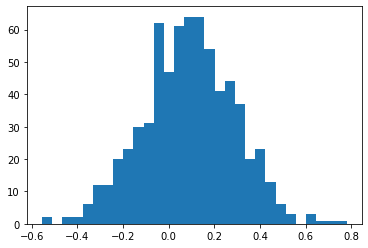

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(flatten_y_pred-y_test,bins=30)

The residuals of the goalkeepers dataset appear to be normally distributed and slightly skewed on the left

In [ ]:
y_pred_real=np.e**y_pred
y_test_real=np.e**y_test

In [ ]:
flatten_y_pred = np.concatenate(y_pred_real)


In [ ]:
y_pred_real= pd.Series(flatten_y_pred).astype(int)
y_test_real = pd.Series(y_test_real).astype(int)

In [ ]:
data = {
    "True vlues": y_test_real,
    "Predicted values": y_pred_real
}

In [ ]:
type(y_test_real), type(y_pred_real)

(pandas.core.series.Series, pandas.core.series.Series)

In [ ]:
df_gk = pd.concat(data, axis = 1)
list_of_indexes = list(y_test_real.index)
list_of_predictions = list(y_pred_real)
list_total = list(zip(list_of_indexes, list(y_test_real), list_of_predictions))
df_gk = pd.DataFrame(list_total, columns = ['index', 'true', 'pred'])
df_gk["Difference"] = df_gk.pred-df_gk.true
df_gk['Difference %'] = round(100*(df_gk.pred-df_gk.true)/df_gk.true, 3)


In [ ]:
#adding the age column to the new dataframe by matching player indexes

age_list = []
for index in list(y_test.index):
    if index in gk_age_dict:
        age_list.append(gk_age_dict[index])
    else:
        break
df_gk['age'] = age_list
col = df_gk.pop("age")
df_gk.insert(0, col.name, col)

In [ ]:
#adding the name column to the new dataframe by matching player indexes

name_list = []
for index in list(y_test_real.index):
    if index in gk_dict:
        name_list.append(gk_dict[index])
    else:
        break
df_gk['player'] = name_list
col = df_gk.pop("player")
df_gk.insert(0, col.name, col)

In [ ]:
gk_mse_all = [mse_gk, mse_gk_tuned, mse_gk_tuned_no_earlystop]
gk_mse_all = [round(num, 3) for num in gk_mse_all]

gk_rmse_all = [rmse_gk, rmse_gk_tuned, rmse_gk_tuned_no_earlystop]
gk_rmse_all = [round(num, 3) for num in gk_rmse_all]

gk_mae_all = [mae_gk, mae_gk_tuned, mae_gk_tuned_no_earlystop]
gk_mae_all = [round(num, 3) for num in gk_mae_all]

gk_mape_all = [mape_gk, mape_gk_tuned, mape_gk_tuned_no_earlystop]
gk_mape_all = [round(num, 3) for num in gk_mape_all]

r2_score_gk_all = [r2_score_gk, r2_score_gk_tuned, r2_score_gk_tuned_no_earlystop]
r2_score_gk_all = [round(num, 3) for num in r2_score_gk_all]

epochs_all = [epochs, epochs_earlystop, epochs_no_earlystop]


method = ["Neural Network", 'Neural Netwotk with Hyperparm. Optimiztion + EarlyStopping', "Neural Netwotk with Hyperparm. Optimiztion without EarlyStopping"]
overview_gk = PrettyTable()

overview_gk.add_column("Method for goalkeepers dataset", method)
overview_gk.add_column("MSE", gk_mse_all)
overview_gk.add_column("RMSE", gk_rmse_all)
overview_gk.add_column("MAE", gk_mae_all)
overview_gk.add_column("MAPE", gk_mape_all)
overview_gk.add_column("R squared ",r2_score_gk_all)
overview_gk.add_column("Epochs ",epochs_all)

print(overview_gk)

+------------------------------------------------------------------+-------+-------+-------+-------+------------+---------+
|                  Method for goalkeepers dataset                  |  MSE  |  RMSE |  MAE  |  MAPE | R squared  | Epochs  |
+------------------------------------------------------------------+-------+-------+-------+-------+------------+---------+
|                          Neural Network                          | 0.066 | 0.256 | 0.203 | 0.016 |    0.97    |   250   |
|    Neural Netwotk with Hyperparm. Optimiztion + EarlyStopping    | 0.048 |  0.22 | 0.176 | 0.014 |   0.978    |   155   |
| Neural Netwotk with Hyperparm. Optimiztion without EarlyStopping | 0.056 | 0.236 | 0.185 | 0.014 |   0.974    |   250   |
+------------------------------------------------------------------+-------+-------+-------+-------+------------+---------+


## Applying NN on NON-goalkeepers dataset

The exactly same procedure will be applied to the 

In [ ]:
#load relative libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


In [ ]:
import numpy as np
import tensorflow as tf
import random as rn

import os
os.environ['PYTHONHASHSEED'] = '0'

os.environ['CUDA_VISIBLE_DEVICES'] = ''
np.random.seed(37)
rn.seed(1254)
tf.random.set_seed(89)

In [ ]:
X_field= field_df.drop(["value_eur"], axis = 1)   #independent features
y_field = field_df["value_eur"]                 #dependent features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_field, y_field, test_size=1/3, random_state= 42)

In [ ]:
#checking the shape of our train set and test set

print("Training set field shape: {}".format(X_train.shape))
print("Test set field shape: {}".format(X_test.shape))
print("Training features shape: {}".format(y_train.shape))
print("Test label set shape: {}".format(y_test.shape))

Training set field shape: (11102, 43)
Test set field shape: (5551, 43)
Training features shape: (11102,)
Test label set shape: (5551,)


In [ ]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Benchmark model

A first benchamark model will be built.
Because of the good results in the previous models, we decided to mantain, complessively the same amount of neurons and layers. Moreover, as it has been done for the goalkeepers dataset, if necessary the parameters will be furtherly tuned

In [ ]:
#Since now we are predicting a single continuous value, the output layer will only have 1 node.

model = Sequential()
model.add(Dense(128, input_dim = X_field.shape[1], activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))

#Output layer
model.add(Dense(1, activation = "linear"))

In [ ]:
model.compile(loss = "mse", optimizer = "adam", metrics = ["mse", "mae", "mape"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               5632      
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 33        
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_field = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs = 250)

Epoch 1/250
278/278 [==============================] - 1s 2ms/step - loss: 48.8311 - mse: 48.8311 - mae: 4.7740 - mape: 35.2346 - val_loss: 0.5071 - val_mse: 0.5071 - val_mae: 0.5642 - val_mape: 4.1907
Epoch 2/250
278/278 [==============================] - 0s 1ms/step - loss: 0.3954 - mse: 0.3954 - mae: 0.4987 - mape: 3.7039 - val_loss: 0.2401 - val_mse: 0.2401 - val_mae: 0.3871 - val_mape: 2.8711
Epoch 3/250
278/278 [==============================] - 0s 1ms/step - loss: 0.2154 - mse: 0.2154 - mae: 0.3648 - mape: 2.7036 - val_loss: 0.1598 - val_mse: 0.1598 - val_mae: 0.3130 - val_mape: 2.3205
Epoch 4/250
278/278 [==============================] - 0s 1ms/step - loss: 0.1487 - mse: 0.1487 - mae: 0.3030 - mape: 2.2501 - val_loss: 0.1296 - val_mse: 0.1296 - val_mae: 0.2787 - val_mape: 2.0661
Epoch 5/250
278/278 [==============================] - 0s 1ms/step - loss: 0.1262 - mse: 0.1262 - mae: 0.2802 - mape: 2.0747 - val_loss: 0.1119 - val_mse: 0.1119 - val_mae: 0.2620 - val_mape: 1.9316
Ep

Epoch 42/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0624 - mse: 0.0624 - mae: 0.1939 - mape: 1.4245 - val_loss: 0.0886 - val_mse: 0.0886 - val_mae: 0.2342 - val_mape: 1.6986
Epoch 43/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0631 - mse: 0.0631 - mae: 0.1953 - mape: 1.4376 - val_loss: 0.0604 - val_mse: 0.0604 - val_mae: 0.1894 - val_mape: 1.3850
Epoch 44/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0608 - mse: 0.0608 - mae: 0.1917 - mape: 1.4124 - val_loss: 0.0724 - val_mse: 0.0724 - val_mae: 0.2107 - val_mape: 1.5376
Epoch 45/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0604 - mse: 0.0604 - mae: 0.1924 - mape: 1.4188 - val_loss: 0.0600 - val_mse: 0.0600 - val_mae: 0.1875 - val_mape: 1.3770
Epoch 46/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0573 - mse: 0.0573 - mae: 0.1864 - mape: 1.3717 - val_loss: 0.0609 - val_mse: 0.0609 - val_mae: 0.1904 - val_mape: 1.3935


Epoch 83/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0518 - mse: 0.0518 - mae: 0.1769 - mape: 1.3011 - val_loss: 0.0966 - val_mse: 0.0966 - val_mae: 0.2549 - val_mape: 1.8545
Epoch 84/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0549 - mse: 0.0549 - mae: 0.1811 - mape: 1.3305 - val_loss: 0.0572 - val_mse: 0.0572 - val_mae: 0.1841 - val_mape: 1.3479
Epoch 85/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0514 - mse: 0.0514 - mae: 0.1759 - mape: 1.2954 - val_loss: 0.0593 - val_mse: 0.0593 - val_mae: 0.1889 - val_mape: 1.3794
Epoch 86/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0546 - mse: 0.0546 - mae: 0.1803 - mape: 1.3293 - val_loss: 0.0549 - val_mse: 0.0549 - val_mae: 0.1778 - val_mape: 1.3052
Epoch 87/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0532 - mse: 0.0532 - mae: 0.1787 - mape: 1.3132 - val_loss: 0.0674 - val_mse: 0.0674 - val_mae: 0.1981 - val_mape: 1.4622


Epoch 124/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0521 - mse: 0.0521 - mae: 0.1764 - mape: 1.2998 - val_loss: 0.0574 - val_mse: 0.0574 - val_mae: 0.1825 - val_mape: 1.3418
Epoch 125/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0493 - mse: 0.0493 - mae: 0.1717 - mape: 1.2605 - val_loss: 0.0579 - val_mse: 0.0579 - val_mae: 0.1865 - val_mape: 1.3698
Epoch 126/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0485 - mse: 0.0485 - mae: 0.1713 - mape: 1.2602 - val_loss: 0.0564 - val_mse: 0.0564 - val_mae: 0.1820 - val_mape: 1.3376
Epoch 127/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0475 - mse: 0.0475 - mae: 0.1688 - mape: 1.2422 - val_loss: 0.0905 - val_mse: 0.0905 - val_mae: 0.2442 - val_mape: 1.7749
Epoch 128/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0523 - mse: 0.0523 - mae: 0.1786 - mape: 1.3141 - val_loss: 0.0537 - val_mse: 0.0537 - val_mae: 0.1777 - val_mape: 1.

Epoch 165/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0468 - mse: 0.0468 - mae: 0.1663 - mape: 1.2249 - val_loss: 0.0677 - val_mse: 0.0677 - val_mae: 0.1986 - val_mape: 1.4717
Epoch 166/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0434 - mse: 0.0434 - mae: 0.1623 - mape: 1.1954 - val_loss: 0.0765 - val_mse: 0.0765 - val_mae: 0.2221 - val_mape: 1.6258
Epoch 167/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0478 - mse: 0.0478 - mae: 0.1691 - mape: 1.2462 - val_loss: 0.0526 - val_mse: 0.0526 - val_mae: 0.1759 - val_mape: 1.2914
Epoch 168/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0455 - mse: 0.0455 - mae: 0.1633 - mape: 1.2061 - val_loss: 0.0550 - val_mse: 0.0550 - val_mae: 0.1810 - val_mape: 1.3254
Epoch 169/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0445 - mse: 0.0445 - mae: 0.1628 - mape: 1.2011 - val_loss: 0.0549 - val_mse: 0.0549 - val_mae: 0.1793 - val_mape: 1.

Epoch 206/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0442 - mse: 0.0442 - mae: 0.1618 - mape: 1.1949 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.1770 - val_mape: 1.3011
Epoch 207/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0447 - mse: 0.0447 - mae: 0.1636 - mape: 1.2061 - val_loss: 0.0553 - val_mse: 0.0553 - val_mae: 0.1808 - val_mape: 1.3227
Epoch 208/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0423 - mse: 0.0423 - mae: 0.1581 - mape: 1.1614 - val_loss: 0.0540 - val_mse: 0.0540 - val_mae: 0.1803 - val_mape: 1.3241
Epoch 209/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0426 - mse: 0.0426 - mae: 0.1602 - mape: 1.1816 - val_loss: 0.0527 - val_mse: 0.0527 - val_mae: 0.1770 - val_mape: 1.2985
Epoch 210/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0446 - mse: 0.0446 - mae: 0.1624 - mape: 1.1972 - val_loss: 0.0621 - val_mse: 0.0621 - val_mae: 0.1951 - val_mape: 1.

Epoch 247/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0412 - mse: 0.0412 - mae: 0.1582 - mape: 1.1670 - val_loss: 0.0539 - val_mse: 0.0539 - val_mae: 0.1756 - val_mape: 1.2993
Epoch 248/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0408 - mse: 0.0408 - mae: 0.1570 - mape: 1.1599 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.1749 - val_mape: 1.2909
Epoch 249/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0388 - mse: 0.0388 - mae: 0.1517 - mape: 1.1208 - val_loss: 0.0568 - val_mse: 0.0568 - val_mae: 0.1841 - val_mape: 1.3581
Epoch 250/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0454 - mse: 0.0454 - mae: 0.1650 - mape: 1.2192 - val_loss: 0.0620 - val_mse: 0.0620 - val_mae: 0.1890 - val_mape: 1.4007


Train: 0.049, Test: 0.060


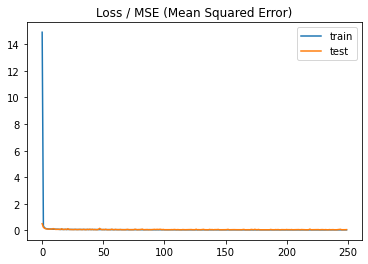

In [ ]:
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse[0], test_mse[0]))

# plot loss during training
plt.title('Loss / MSE (Mean Squared Error)')
plt.plot(history_field.history['loss'], label='train')
plt.plot(history_field.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
y_pred_field = model.predict(X_test)
mse_field = metrics.mean_squared_error(y_test, y_pred_field)
rmse_field= np.sqrt(mean_squared_error(y_test, y_pred_field))
mae_field = mean_absolute_error(y_test,y_pred_field)
mape_field = mean_absolute_percentage_error(y_test,y_pred_field)
r2_score_field = r2_score(y_test, y_pred_field)

print("Mean squarred error (field): {}".format(mse_field))
print("Root mean squarred error (field): {}".format(rmse_field))
print("Mean Absolute Error: {}".format(mae_field))
print("MAPE: {}".format(mape_field))
print("R squared:{}".format(r2_score_field))

Mean squarred error (field): 0.0599018247340535
Root mean squarred error (field): 0.24474849281262898
Mean Absolute Error: 0.18758275235240393
MAPE: 0.013931792322561807
R squared:0.9679076212681311


In [ ]:
epochs_field = len(history_field.history["loss"])
print("Epochs", epochs)

Epochs 250


### Hyperparameter optimization with RandomSearch

As it can be noticed in the cell above, the model learns quickly how to tuned and adjust all the parameters in the NN. it's evident that there are not signs of underfitting or overfitting. The only insight we might have is that 250 epochs are more than enough.

However, we decided to pursue our analysis by increasing the efficency of the NN by performing hyperparameter optimization

In [ ]:
def model_field(hp):
    first_layers_neuron = hp.Choice("Number of neurons Input layer", [128, 100, 80, 60, 40, 30, 10])
    model = Sequential()
    model.add(keras.layers.Dense(first_layers_neuron, input_dim = X_field.shape[1], activation = "relu"))
    for i in range(hp.Int('num_layers', 1, 7)):                      #number of hidden layers
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=5,       #min number of neurons
                                            max_value=128,     #max number of neurons
                                            step=22),
                               activation='relu'))
    model.add(keras.layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [0.01, 1e-3, 1e-4])),  #what should be the learning rate
        loss='mse',
        metrics=['mse'])
    return model

In [ ]:
tuner_field = RandomSearch(
    model_field,
    objective='val_mse',
    max_trials=3,
    executions_per_trial=3,
    directory='temp_2')

INFO:tensorflow:Reloading Oracle from existing project temp_2\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from temp_2\untitled_project\tuner0.json


In [ ]:
tuner_field.search(X_train, y_train, epochs = 250, validation_data = (X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner_field.get_best_hyperparameters()[0].values


{'Number of neurons Input layer': 40,
 'num_layers': 5,
 'units_0': 37,
 'learning_rate': 0.001,
 'units_1': 49,
 'units_2': 115,
 'units_3': 49,
 'units_4': 5}

In [ ]:
tuner_field.get_best_models()[0].summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                1760      
_________________________________________________________________
dense_1 (Dense)              (None, 37)                1517      
_________________________________________________________________
dense_2 (Dense)              (None, 49)                1862      
_________________________________________________________________
dense_3 (Dense)              (None, 115)               5750      
_________________________________________________________________
dense_4 (Dense)              (None, 49)                5684      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 250       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

### NN without EarlyStopping

In [ ]:
#Since now we are predicting a single continuous value, the output layer will only have 1 node.

model = Sequential()
model.add(Dense(40, input_dim = X_field.shape[1], activation = "relu"))
model.add(Dense(37, activation = "relu"))         #first hidden layer
model.add(Dense(49, activation = "relu"))        #second hidden layer
model.add(Dense(115, activation = "relu"))        
model.add(Dense(49, activation = "relu"))        
model.add(Dense(5, activation = "relu"))        


#Output layer
model.add(Dense(1, activation = "linear"))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = "mse", optimizer = opt, metrics = ["mse", "mae", "mape"])

history_1_field = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs = 250)

Epoch 1/250
278/278 [==============================] - 1s 2ms/step - loss: 40.0968 - mse: 40.0968 - mae: 4.0480 - mape: 29.8689 - val_loss: 0.3745 - val_mse: 0.3745 - val_mae: 0.4887 - val_mape: 3.6126
Epoch 2/250
278/278 [==============================] - 0s 1ms/step - loss: 0.3233 - mse: 0.3233 - mae: 0.4479 - mape: 3.3290 - val_loss: 0.2528 - val_mse: 0.2528 - val_mae: 0.3996 - val_mape: 2.9765
Epoch 3/250
278/278 [==============================] - 0s 1ms/step - loss: 0.2089 - mse: 0.2089 - mae: 0.3624 - mape: 2.6908 - val_loss: 0.2511 - val_mse: 0.2511 - val_mae: 0.3983 - val_mape: 2.9690
Epoch 4/250
278/278 [==============================] - 0s 1ms/step - loss: 0.1793 - mse: 0.1793 - mae: 0.3347 - mape: 2.4833 - val_loss: 0.1553 - val_mse: 0.1553 - val_mae: 0.3125 - val_mape: 2.3145
Epoch 5/250
278/278 [==============================] - 0s 1ms/step - loss: 0.1524 - mse: 0.1524 - mae: 0.3102 - mape: 2.2910 - val_loss: 0.2153 - val_mse: 0.2153 - val_mae: 0.3783 - val_mape: 2.7478
Ep

Epoch 42/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0702 - mse: 0.0702 - mae: 0.2075 - mape: 1.5269 - val_loss: 0.0641 - val_mse: 0.0641 - val_mae: 0.1962 - val_mape: 1.4376
Epoch 43/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0700 - mse: 0.0700 - mae: 0.2067 - mape: 1.5212 - val_loss: 0.0606 - val_mse: 0.0606 - val_mae: 0.1895 - val_mape: 1.3894
Epoch 44/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0662 - mse: 0.0662 - mae: 0.2002 - mape: 1.4757 - val_loss: 0.0662 - val_mse: 0.0662 - val_mae: 0.1985 - val_mape: 1.4599
Epoch 45/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0694 - mse: 0.0694 - mae: 0.2057 - mape: 1.5158 - val_loss: 0.0649 - val_mse: 0.0649 - val_mae: 0.1974 - val_mape: 1.4491
Epoch 46/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0620 - mse: 0.0620 - mae: 0.1936 - mape: 1.4251 - val_loss: 0.0712 - val_mse: 0.0712 - val_mae: 0.2115 - val_mape: 1.5466


Epoch 83/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0558 - mse: 0.0558 - mae: 0.1846 - mape: 1.3585 - val_loss: 0.1064 - val_mse: 0.1064 - val_mae: 0.2696 - val_mape: 1.9610
Epoch 84/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0590 - mse: 0.0590 - mae: 0.1879 - mape: 1.3791 - val_loss: 0.0575 - val_mse: 0.0575 - val_mae: 0.1840 - val_mape: 1.3503
Epoch 85/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0569 - mse: 0.0569 - mae: 0.1857 - mape: 1.3676 - val_loss: 0.0575 - val_mse: 0.0575 - val_mae: 0.1837 - val_mape: 1.3495
Epoch 86/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0578 - mse: 0.0578 - mae: 0.1864 - mape: 1.3723 - val_loss: 0.0802 - val_mse: 0.0802 - val_mae: 0.2189 - val_mape: 1.6218
Epoch 87/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0583 - mse: 0.0583 - mae: 0.1872 - mape: 1.3752 - val_loss: 0.0627 - val_mse: 0.0627 - val_mae: 0.1909 - val_mape: 1.4066


Epoch 124/250
278/278 [==============================] - 1s 3ms/step - loss: 0.0574 - mse: 0.0574 - mae: 0.1863 - mape: 1.3679 - val_loss: 0.0558 - val_mse: 0.0558 - val_mae: 0.1813 - val_mape: 1.3302
Epoch 125/250
278/278 [==============================] - 1s 2ms/step - loss: 0.0525 - mse: 0.0525 - mae: 0.1779 - mape: 1.3065 - val_loss: 0.0593 - val_mse: 0.0593 - val_mae: 0.1855 - val_mape: 1.3664
Epoch 126/250
278/278 [==============================] - 1s 2ms/step - loss: 0.0507 - mse: 0.0507 - mae: 0.1754 - mape: 1.2905 - val_loss: 0.0720 - val_mse: 0.0720 - val_mae: 0.2130 - val_mape: 1.5531
Epoch 127/250
278/278 [==============================] - 1s 2ms/step - loss: 0.0537 - mse: 0.0537 - mae: 0.1805 - mape: 1.3267 - val_loss: 0.0853 - val_mse: 0.0853 - val_mae: 0.2384 - val_mape: 1.7359
Epoch 128/250
278/278 [==============================] - 1s 2ms/step - loss: 0.0528 - mse: 0.0528 - mae: 0.1788 - mape: 1.3146 - val_loss: 0.0612 - val_mse: 0.0612 - val_mae: 0.1880 - val_mape: 1.

Epoch 165/250
278/278 [==============================] - 1s 2ms/step - loss: 0.0468 - mse: 0.0468 - mae: 0.1673 - mape: 1.2313 - val_loss: 0.0566 - val_mse: 0.0566 - val_mae: 0.1825 - val_mape: 1.3337
Epoch 166/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0464 - mse: 0.0464 - mae: 0.1672 - mape: 1.2296 - val_loss: 0.0649 - val_mse: 0.0649 - val_mae: 0.1917 - val_mape: 1.4125
Epoch 167/250
278/278 [==============================] - 1s 2ms/step - loss: 0.0532 - mse: 0.0532 - mae: 0.1810 - mape: 1.3325 - val_loss: 0.0549 - val_mse: 0.0549 - val_mae: 0.1771 - val_mape: 1.3005
Epoch 168/250
278/278 [==============================] - 1s 2ms/step - loss: 0.0496 - mse: 0.0496 - mae: 0.1726 - mape: 1.2731 - val_loss: 0.0593 - val_mse: 0.0593 - val_mae: 0.1862 - val_mape: 1.3662
Epoch 169/250
278/278 [==============================] - 1s 2ms/step - loss: 0.0500 - mse: 0.0500 - mae: 0.1729 - mape: 1.2714 - val_loss: 0.0568 - val_mse: 0.0568 - val_mae: 0.1808 - val_mape: 1.

Epoch 206/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0462 - mse: 0.0462 - mae: 0.1645 - mape: 1.2115 - val_loss: 0.0549 - val_mse: 0.0549 - val_mae: 0.1765 - val_mape: 1.2938
Epoch 207/250
278/278 [==============================] - 1s 2ms/step - loss: 0.0461 - mse: 0.0461 - mae: 0.1671 - mape: 1.2282 - val_loss: 0.0552 - val_mse: 0.0552 - val_mae: 0.1802 - val_mape: 1.3194
Epoch 208/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0442 - mse: 0.0442 - mae: 0.1624 - mape: 1.1910 - val_loss: 0.0562 - val_mse: 0.0562 - val_mae: 0.1815 - val_mape: 1.3303
Epoch 209/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0445 - mse: 0.0445 - mae: 0.1644 - mape: 1.2101 - val_loss: 0.0692 - val_mse: 0.0692 - val_mae: 0.2036 - val_mape: 1.5057
Epoch 210/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0480 - mse: 0.0480 - mae: 0.1683 - mape: 1.2399 - val_loss: 0.0637 - val_mse: 0.0637 - val_mae: 0.1949 - val_mape: 1.

Epoch 247/250
278/278 [==============================] - 1s 2ms/step - loss: 0.0438 - mse: 0.0438 - mae: 0.1626 - mape: 1.1980 - val_loss: 0.0750 - val_mse: 0.0750 - val_mae: 0.2122 - val_mape: 1.5683
Epoch 248/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0452 - mse: 0.0452 - mae: 0.1650 - mape: 1.2143 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.1768 - val_mape: 1.2948
Epoch 249/250
278/278 [==============================] - 1s 2ms/step - loss: 0.0409 - mse: 0.0409 - mae: 0.1565 - mape: 1.1544 - val_loss: 0.0550 - val_mse: 0.0550 - val_mae: 0.1795 - val_mape: 1.3166
Epoch 250/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0480 - mse: 0.0480 - mae: 0.1697 - mape: 1.2516 - val_loss: 0.0565 - val_mse: 0.0565 - val_mae: 0.1782 - val_mape: 1.3137


Train: 0.045, Test: 0.054


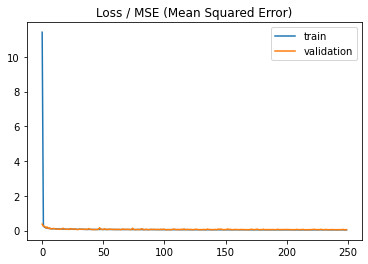

In [ ]:
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse[0], test_mse[0]))

# plot loss during training
plt.title('Loss / MSE (Mean Squared Error)')
plt.plot(history_1_field.history['loss'], label='train')
plt.plot(history_1_field.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [ ]:
y_pred_field_no_earlystopping = model.predict(X_test)
mse_field_tuner_no_earlystopping = metrics.mean_squared_error(y_test, y_pred_field_no_earlystopping)
rmse_field_tuner_no_earlystopping= np.sqrt(mean_squared_error(y_test, y_pred_field_no_earlystopping))
mae_field_tuner_no_earlystopping = mean_absolute_error(y_test,y_pred_field_no_earlystopping)
mape_field_tuner_no_earlystopping = mean_absolute_percentage_error(y_test,y_pred_field_no_earlystopping)
r2_score_field_tuner_no_earlystopping = r2_score(y_test, y_pred_field_no_earlystopping)

print("Mean squarred error (field_tuner): {}".format(mse_field_tuner_no_earlystopping))
print("Root mean squarred error (field_tuner): {}".format(rmse_field_tuner_no_earlystopping))
print("Mean absolute error (field_tuner): {}".format(mae_field_tuner_no_earlystopping))
print("MAPE (field_tuner): {}".format(mape_field_tuner_no_earlystopping))
print("R squared (field_tuner): {}".format(r2_score_field_tuner_no_earlystopping))

Mean squarred error (field_tuner): 0.05419532922506465
Root mean squarred error (field_tuner): 0.23279890297221043
Mean absolute error (field_tuner): 0.17757174251127272
MAPE (field_tuner): 0.013106454387074822
R squared (field_tuner): 0.9709648739631742


In [ ]:
epochs_field_no_earlystopping = len(history_1_field.history["loss"])

### NN with EarlyStopping

Now we implement the model with the parameters obtained from the Keras tuner.

In [ ]:
#Since now we are predicting a single continuous value, the output layer will only have 1 node.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=40, min_delta = 0.0)


model = Sequential()
model.add(Dense(40, input_dim = X_field.shape[1], activation = "relu"))
model.add(Dense(37, activation = "relu"))         #first hidden layer
model.add(Dense(49, activation = "relu"))        #second hidden layer
model.add(Dense(115, activation = "relu"))        
model.add(Dense(49, activation = "relu"))        
model.add(Dense(5, activation = "relu"))        


#Output layer
model.add(Dense(1, activation = "linear"))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = "mse", optimizer = opt, metrics = ["mse", "mae", "mape"])

history_2_field = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs = 250, callbacks = [callback])

Epoch 1/250
278/278 [==============================] - 2s 3ms/step - loss: 80.8280 - mse: 80.8280 - mae: 6.7821 - mape: 49.9719 - val_loss: 0.9023 - val_mse: 0.9023 - val_mae: 0.7727 - val_mape: 5.7325
Epoch 2/250
278/278 [==============================] - 1s 2ms/step - loss: 0.6688 - mse: 0.6688 - mae: 0.6539 - mape: 4.8702 - val_loss: 0.3149 - val_mse: 0.3149 - val_mae: 0.4451 - val_mape: 3.3088
Epoch 3/250
278/278 [==============================] - 1s 3ms/step - loss: 0.2904 - mse: 0.2904 - mae: 0.4232 - mape: 3.1465 - val_loss: 0.2233 - val_mse: 0.2233 - val_mae: 0.3766 - val_mape: 2.8017
Epoch 4/250
278/278 [==============================] - 0s 2ms/step - loss: 0.2069 - mse: 0.2069 - mae: 0.3604 - mape: 2.6773 - val_loss: 0.1817 - val_mse: 0.1817 - val_mae: 0.3384 - val_mape: 2.5086
Epoch 5/250
278/278 [==============================] - 1s 2ms/step - loss: 0.1726 - mse: 0.1726 - mae: 0.3283 - mape: 2.4288 - val_loss: 0.2098 - val_mse: 0.2098 - val_mae: 0.3693 - val_mape: 2.6972
Ep

Epoch 42/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0712 - mse: 0.0712 - mae: 0.2078 - mape: 1.5281 - val_loss: 0.0713 - val_mse: 0.0713 - val_mae: 0.2078 - val_mape: 1.5282
Epoch 43/250
278/278 [==============================] - 1s 2ms/step - loss: 0.0701 - mse: 0.0701 - mae: 0.2070 - mape: 1.5290 - val_loss: 0.0884 - val_mse: 0.0884 - val_mae: 0.2368 - val_mape: 1.7208
Epoch 44/250
278/278 [==============================] - 1s 2ms/step - loss: 0.0746 - mse: 0.0746 - mae: 0.2130 - mape: 1.5724 - val_loss: 0.0721 - val_mse: 0.0721 - val_mae: 0.2104 - val_mape: 1.5414
Epoch 45/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0688 - mse: 0.0688 - mae: 0.2054 - mape: 1.5173 - val_loss: 0.0669 - val_mse: 0.0669 - val_mae: 0.2014 - val_mape: 1.4814
Epoch 46/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0657 - mse: 0.0657 - mae: 0.2005 - mape: 1.4788 - val_loss: 0.0679 - val_mse: 0.0679 - val_mae: 0.2042 - val_mape: 1.4982


Epoch 83/250
278/278 [==============================] - 1s 2ms/step - loss: 0.0556 - mse: 0.0556 - mae: 0.1833 - mape: 1.3500 - val_loss: 0.1050 - val_mse: 0.1050 - val_mae: 0.2695 - val_mape: 1.9572
Epoch 84/250
278/278 [==============================] - 1s 2ms/step - loss: 0.0553 - mse: 0.0553 - mae: 0.1822 - mape: 1.3396 - val_loss: 0.0583 - val_mse: 0.0583 - val_mae: 0.1877 - val_mape: 1.3729
Epoch 85/250
278/278 [==============================] - 1s 2ms/step - loss: 0.0530 - mse: 0.0530 - mae: 0.1783 - mape: 1.3142 - val_loss: 0.0558 - val_mse: 0.0558 - val_mae: 0.1820 - val_mape: 1.3355
Epoch 86/250
278/278 [==============================] - 1s 2ms/step - loss: 0.0544 - mse: 0.0544 - mae: 0.1786 - mape: 1.3173 - val_loss: 0.0647 - val_mse: 0.0647 - val_mae: 0.1924 - val_mape: 1.4208
Epoch 87/250
278/278 [==============================] - 1s 2ms/step - loss: 0.0561 - mse: 0.0561 - mae: 0.1828 - mape: 1.3438 - val_loss: 0.0672 - val_mse: 0.0672 - val_mae: 0.1960 - val_mape: 1.4485


Epoch 124/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0515 - mse: 0.0515 - mae: 0.1737 - mape: 1.2813 - val_loss: 0.0475 - val_mse: 0.0475 - val_mae: 0.1616 - val_mape: 1.1935
Epoch 125/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - mae: 0.1671 - mape: 1.2315 - val_loss: 0.0549 - val_mse: 0.0549 - val_mae: 0.1774 - val_mape: 1.3136
Epoch 126/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0477 - mse: 0.0477 - mae: 0.1683 - mape: 1.2450 - val_loss: 0.0568 - val_mse: 0.0568 - val_mae: 0.1814 - val_mape: 1.3340
Epoch 127/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0464 - mse: 0.0464 - mae: 0.1656 - mape: 1.2253 - val_loss: 0.0580 - val_mse: 0.0580 - val_mae: 0.1867 - val_mape: 1.3631
Epoch 128/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0455 - mse: 0.0455 - mae: 0.1625 - mape: 1.2009 - val_loss: 0.0584 - val_mse: 0.0584 - val_mae: 0.1837 - val_mape: 1.

Epoch 165/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0430 - mse: 0.0430 - mae: 0.1583 - mape: 1.1731 - val_loss: 0.0543 - val_mse: 0.0543 - val_mae: 0.1729 - val_mape: 1.2798
Epoch 166/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0406 - mse: 0.0406 - mae: 0.1559 - mape: 1.1546 - val_loss: 0.0491 - val_mse: 0.0491 - val_mae: 0.1604 - val_mape: 1.1878
Epoch 167/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0447 - mse: 0.0447 - mae: 0.1625 - mape: 1.2024 - val_loss: 0.0486 - val_mse: 0.0486 - val_mae: 0.1617 - val_mape: 1.1963
Epoch 168/250
278/278 [==============================] - 0s 1ms/step - loss: 0.0438 - mse: 0.0438 - mae: 0.1580 - mape: 1.1734 - val_loss: 0.0472 - val_mse: 0.0472 - val_mae: 0.1636 - val_mape: 1.2075
Epoch 169/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0447 - mse: 0.0447 - mae: 0.1610 - mape: 1.1939 - val_loss: 0.0491 - val_mse: 0.0491 - val_mae: 0.1652 - val_mape: 1.

Epoch 206/250
278/278 [==============================] - 1s 3ms/step - loss: 0.0412 - mse: 0.0412 - mae: 0.1532 - mape: 1.1362 - val_loss: 0.0465 - val_mse: 0.0465 - val_mae: 0.1580 - val_mape: 1.1671
Epoch 207/250
278/278 [==============================] - 1s 2ms/step - loss: 0.0410 - mse: 0.0410 - mae: 0.1550 - mape: 1.1484 - val_loss: 0.0661 - val_mse: 0.0661 - val_mae: 0.2077 - val_mape: 1.5161
Epoch 208/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0432 - mse: 0.0432 - mae: 0.1588 - mape: 1.1709 - val_loss: 0.0487 - val_mse: 0.0487 - val_mae: 0.1633 - val_mape: 1.2057
Epoch 209/250
278/278 [==============================] - 1s 2ms/step - loss: 0.0387 - mse: 0.0387 - mae: 0.1498 - mape: 1.1098 - val_loss: 0.0609 - val_mse: 0.0609 - val_mae: 0.1879 - val_mape: 1.3947
Epoch 210/250
278/278 [==============================] - 0s 2ms/step - loss: 0.0486 - mse: 0.0486 - mae: 0.1683 - mape: 1.2450 - val_loss: 0.0481 - val_mse: 0.0481 - val_mae: 0.1632 - val_mape: 1.

Train: 0.040, Test: 0.044


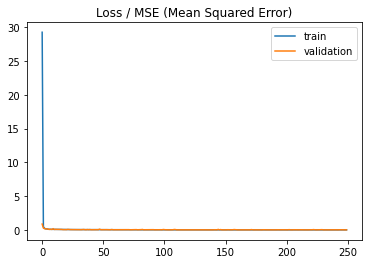

In [ ]:
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse[0], test_mse[0]))

# plot loss during training
plt.title('Loss / MSE (Mean Squared Error)')
plt.plot(history_2_field.history['loss'], label='train')
plt.plot(history_2_field.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [ ]:
y_pred_field_tuner = model.predict(X_test)
mse_field_tuner = metrics.mean_squared_error(y_test, y_pred_field_tuner)
rmse_field_tuner= np.sqrt(mean_squared_error(y_test, y_pred_field_tuner))
mae_field_tuner = mean_absolute_error(y_test,y_pred_field_tuner)
mape_field_tuner = mean_absolute_percentage_error(y_test,y_pred_field_tuner)
r2_score_field_tuner = r2_score(y_test, y_pred_field_tuner)

print("Mean squarred error (field_tuner): {}".format(mse_field_tuner))
print("Root mean squarred error (field_tuner): {}".format(rmse_field_tuner))
print("Mean absolute error (field_tuner): {}".format(mae_field_tuner))
print("MAPE (field_tuner): {}".format(mape_field_tuner))
print("R squared (field_tuner): {}".format(r2_score_field_tuner))


Mean squarred error (field_tuner): 0.044345353549719614
Root mean squarred error (field_tuner): 0.21058336484565826
Mean absolute error (field_tuner): 0.15967767742763664
MAPE (field_tuner): 0.011864969647050872
R squared (field_tuner): 0.9762419945062678


In [ ]:
epochs_field_earlystopping = len(history_2_field.history["loss"])

(array([  1.,   4.,   7.,  13.,  42.,  99., 168., 299., 456., 772., 878.,
        931., 732., 489., 270., 163.,  91.,  60.,  29.,  24.,   7.,   9.,
          3.,   0.,   3.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.78470692, -0.70951215, -0.63431737, -0.55912259, -0.48392781,
        -0.40873304, -0.33353826, -0.25834348, -0.1831487 , -0.10795392,
        -0.03275915,  0.04243563,  0.11763041,  0.19282519,  0.26801996,
         0.34321474,  0.41840952,  0.4936043 ,  0.56879908,  0.64399385,
         0.71918863,  0.79438341,  0.86957819,  0.94477296,  1.01996774,
         1.09516252,  1.1703573 ,  1.24555207,  1.32074685,  1.39594163,
         1.47113641]),
 <a list of 30 Patch objects>)

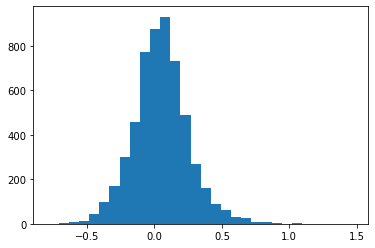

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
flatten_y_pred = np.concatenate(y_pred_field_tuner)
plt.hist(flatten_y_pred-y_test,bins=30)

In [ ]:
y_pred_real_field=np.e**y_pred_field_tuner
y_test_real=np.e**y_test

In [ ]:
flatten_y_pred_field = np.concatenate(y_pred_real_field)
y_pred_real_field= pd.Series(flatten_y_pred_field).astype(int)
y_test_real_field = pd.Series(y_test_real).astype(int)

In [ ]:
data = {
    "True vlues": y_test_real_field,
    "Predicted values": y_pred_real_field
}

In [ ]:
df_field = pd.concat(data, axis = 1)
list_of_indexes = list(y_test_real_field.index)
list_of_predictions = list(y_pred_real_field)
list_total = list(zip(list_of_indexes, list(y_test_real_field), list_of_predictions))
df_field = pd.DataFrame(list_total, columns = ['index', 'true', 'pred'])
df_field["Difference"] = df_field.pred-df_field.true
df_field['Difference %'] = round(100*(df_field.pred-df_field.true)/df_field.true, 3)

In [ ]:
name_list = []
for index in list(y_test_real_field.index):
    if index in field_dict:
        name_list.append(field_dict[index])
    else:
        break
df_field['player'] = name_list
col = df_field.pop("player")
df_field.insert(0, col.name, col)

In [ ]:
#adding the age column to the new dataframe by matching player indexes

age_list = []
for index in list(y_test.index):
    if index in field_age_dict:
        age_list.append(field_age_dict[index])
    else:
        break
df_field['age'] = age_list
col = df_field.pop("age")
df_field.insert(0, col.name, col)

In [ ]:
fields_mse_all = [mse_field, mse_field_tuner_no_earlystopping, mse_field_tuner]
fields_mse_all = [round(num, 3) for num in fields_mse_all]

fields_rmse_all = [rmse_field, rmse_field_tuner_no_earlystopping, rmse_field_tuner]
fields_rmse_all = [round(num, 3) for num in fields_rmse_all]

fields_mae_all = [mae_field, mae_field_tuner_no_earlystopping, mae_field_tuner]
fields_mae_all = [round(num, 3) for num in fields_mae_all]

fields_mape_all = [mape_field, mape_field_tuner_no_earlystopping, mape_field_tuner]
fields_mape_all = [round(num, 3) for num in fields_mape_all]

r2_score_field_all = [r2_score_field, r2_score_field_tuner_no_earlystopping, r2_score_field_tuner]
r2_score_field_all = [round(num, 3) for num in r2_score_field_all]

epochs_all = [epochs, epochs_field_no_earlystopping, epochs_field_earlystopping]


method = ["Neural Network", 'Neural Netwotk with Hyperparameter Optimiztion', 'Neural Netwotk with Hyperparameter Optimiztion + EarlyStopping']
overview_fields = PrettyTable()

overview_fields.add_column("Method for NON-goalkeepers dataset", method)
overview_fields.add_column("MSE", fields_mse_all)
overview_fields.add_column("RMSE", fields_rmse_all)
overview_fields.add_column("MAE", fields_mae_all)
overview_fields.add_column("MAPE", fields_mape_all)
overview_fields.add_column("R squared", r2_score_field_all)
overview_fields.add_column("Epochs", epochs_all)


print(overview_fields)
#print(overview_gk)


+----------------------------------------------------------------+-------+-------+-------+-------+-----------+--------+
|               Method for NON-goalkeepers dataset               |  MSE  |  RMSE |  MAE  |  MAPE | R squared | Epochs |
+----------------------------------------------------------------+-------+-------+-------+-------+-----------+--------+
|                         Neural Network                         |  0.06 | 0.245 | 0.188 | 0.014 |   0.968   |  250   |
|         Neural Netwotk with Hyperparameter Optimiztion         | 0.054 | 0.233 | 0.178 | 0.013 |   0.971   |  250   |
| Neural Netwotk with Hyperparameter Optimiztion + EarlyStopping | 0.044 | 0.211 |  0.16 | 0.012 |   0.976   |  250   |
+----------------------------------------------------------------+-------+-------+-------+-------+-----------+--------+


In [ ]:
df_gk_final_perc = df_gk.nlargest(100,'Difference %')
df_gk_final_total = df_gk.nlargest(100,"Difference")
list_gk_topperc = list(df_gk_final_perc.player)
df_gk_final = df_gk_final_total[df_gk_final_total.player.isin(list_gk_topperc)]
df_gk_final["Position"] = "GK"

df_field_final_perc = df_field.nlargest(1000,'Difference %')
df_field_final_total = df_field.nlargest(1000,"Difference")
list_field_topperc = list(df_field_final_perc.player)
df_field_final = df_field_final_total[df_field_final_total.player.isin(list_field_topperc)]
df_field_final["Position"] = "FP"

final = df_gk_final.append(df_field_final, ignore_index=True)
final[(final.age <= 23) & (final.true >= 1000000)].sort_values(by="Difference",ascending=False)

<ipython-input-355-a71529639c30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gk_final["Position"] = "GK"
<ipython-input-355-a71529639c30>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_field_final["Position"] = "FP"


,player,age,index,true,pred,Difference,Difference %,Position
51,Onyinye Wilfred Ndidi,23,111,36499999,48034900,11534901,31.602,FP
52,Marcus Thuram,22,374,20499999,31873334,11373335,55.480,FP
60,A. Benjamin Chiamuloira Paes,20,866,9999999,16983296,6983297,69.833,FP
63,Daniel Ceballos Fernández,23,383,19499999,25868392,6368393,32.658,FP
65,Luka Jović,22,387,20000000,26139396,6139396,30.697,FP
...,...,...,...,...,...,...,...,...
415,Kenneth Paal,23,5440,1299999,1622923,322924,24.840,FP
423,William Togui,23,7596,1000000,1317449,317449,31.745,FP
427,Lewis O'Brien,21,6294,1299999,1612912,312913,24.070,FP
438,Cédric Kipré,23,6361,1199999,1502201,302202,25.184,FP


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d0001f84-164c-454a-9f8a-a2e6174a5f5c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>